In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./car_price_prediction.csv")

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4


# Data Cleaning

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,"19,237.00","19,237.00","19,237.00","19,237.00","19,237.00"
mean,"45,576,535.89","18,555.93","2,010.91",4.58,6.58
std,"936,591.42","190,581.27",5.67,1.20,4.32
min,"20,746,880.00",1.00,"1,939.00",1.00,0.00
25%,"45,698,374.00","5,331.00","2,009.00",4.00,4.00
50%,"45,772,308.00","13,172.00","2,012.00",4.00,6.00
75%,"45,802,036.00","22,075.00","2,015.00",4.00,12.00
max,"45,816,654.00","26,307,500.00","2,020.00",16.00,16.00


In [5]:
for col in df.columns:
    print(col,":",df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print("*****************")

ID : 18924
45815365    8
45815361    8
45815363    7
45815368    7
45723475    7
Name: ID, dtype: int64
*****************
Price : 2315
15681    280
470      274
14113    244
392      242
314      235
Name: Price, dtype: int64
*****************
Levy : 559
-      5819
765     486
891     461
639     410
640     405
Name: Levy, dtype: int64
*****************
Manufacturer : 65
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
Name: Manufacturer, dtype: int64
*****************
Model : 1590
Prius      1083
Sonata     1079
Camry       938
Elantra     922
E 350       542
Name: Model, dtype: int64
*****************
Prod. year : 54
2012    2155
2014    2124
2013    1963
2011    1612
2015    1549
Name: Prod. year, dtype: int64
*****************
Category : 11
Sedan        8736
Jeep         5473
Hatchback    2847
Minivan       647
Coupe         532
Name: Category, dtype: int64
*****************
Leather interior : 2
Yes    13954
No      528

### Check For missing or null values

In [6]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

### ID field is useless 

In [7]:
df.drop(columns='ID', inplace=True)
df.head(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4


In [8]:
df.columns=df.columns.str.lower().str.replace(" ","_")
df.head(5)

,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4


In [9]:
df[df['levy'] == "-"]

,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
9,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
11,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8,Manual,Rear,2-Mar,Left wheel,Blue,0
12,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4,Manual,Front,4-May,Left wheel,White,4
23,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4,Manual,Front,2-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4,Automatic,Front,4-May,Left wheel,Blue,4
19224,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4,Automatic,Front,4-May,Left wheel,Black,12
19226,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6,Tiptronic,Rear,4-May,Right-hand drive,White,0
19229,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4,Automatic,Front,4-May,Left wheel,Silver,6


In [10]:
# we will replace the '-' with Zero
df['levy'].replace({'-':0}, inplace = True)
# we have to convert the type of the Levy column  to float
df['levy'] = df['levy'].astype('float64')

In [11]:
df.isnull().sum()

price               0
levy                0
manufacturer        0
model               0
prod._year          0
category            0
leather_interior    0
fuel_type           0
engine_volume       0
mileage             0
cylinders           0
gear_box_type       0
drive_wheels        0
doors               0
wheel               0
color               0
airbags             0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(15725, 17)

In [13]:
df=df[df["price"]>500]
df.shape

(14799, 17)

In [14]:
df['Turbo_engine']=df['engine_volume'].str.contains('Turbo')
df['engine_volume']=df['engine_volume'].str.slice(0,3)
df['engine_volume']=df['engine_volume'].astype('float64')

In [15]:
df.rename(columns={'mileage':'Mileage/km'},inplace=True)
df['Mileage/km']=df['Mileage/km'].str.strip('km')
df['Mileage/km']=df['Mileage/km'].astype('int64')

In [16]:
df['cylinders']=df['cylinders'].astype('int64')

In [17]:
df['doors'].replace({'4-May':'4','2-Mar':'2','>5':'5'},inplace=True)
df['doors']=df['doors'].astype('int64')

In [18]:
categorical_col=df.select_dtypes(['object','boolean'])
categorical_col.head(5)
categorical_col.drop(columns='model', inplace = True)
print(categorical_col.columns)


Index(['manufacturer', 'category', 'leather_interior', 'fuel_type',
       'gear_box_type', 'drive_wheels', 'wheel', 'color', 'Turbo_engine'],
      dtype='object')


In [19]:
numerical_col=df.select_dtypes(['int','float'])
numerical_col.head(5)

,price,levy,prod._year,engine_volume,Mileage/km,cylinders,doors,airbags
0,13328,"1,399.00",2010,3.50,186005,6,4,12
1,16621,"1,018.00",2011,3.00,192000,6,4,8
2,8467,0.00,2006,1.30,200000,4,4,2
3,3607,862.00,2011,2.50,168966,4,4,0
4,11726,446.00,2014,1.30,91901,4,4,4


# EDA

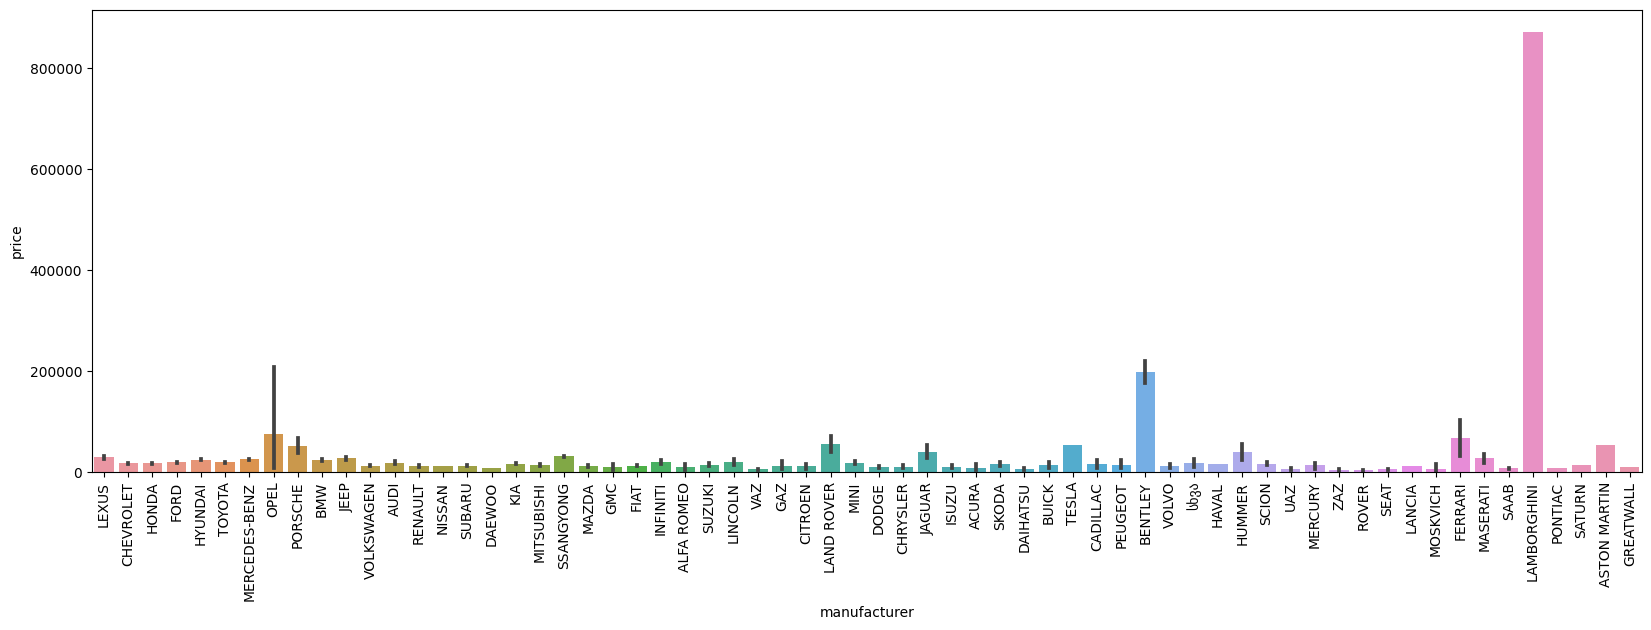

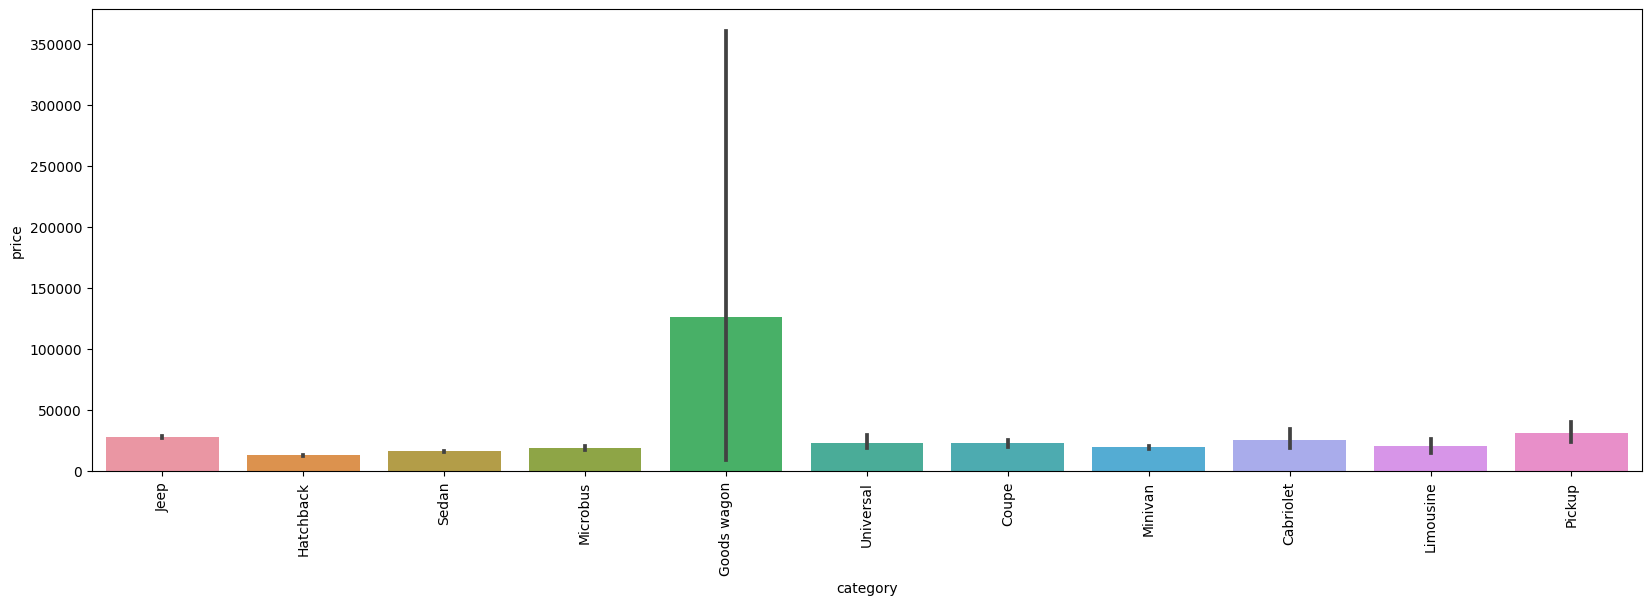

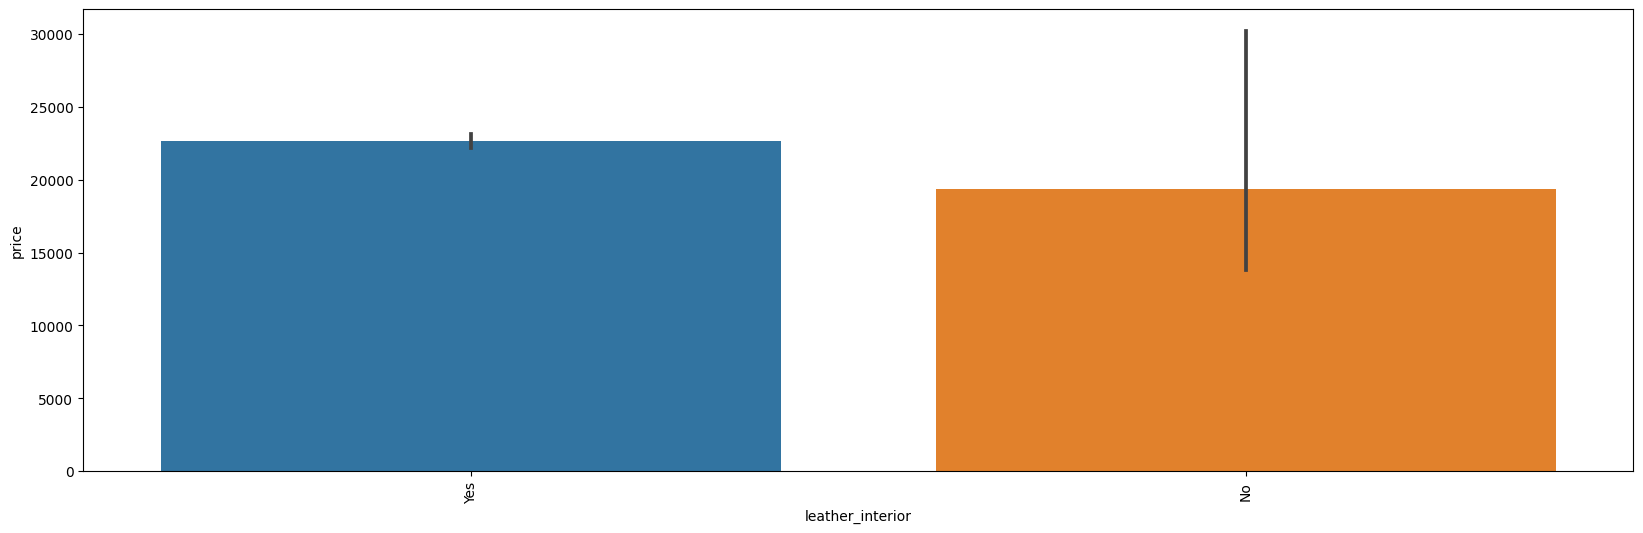

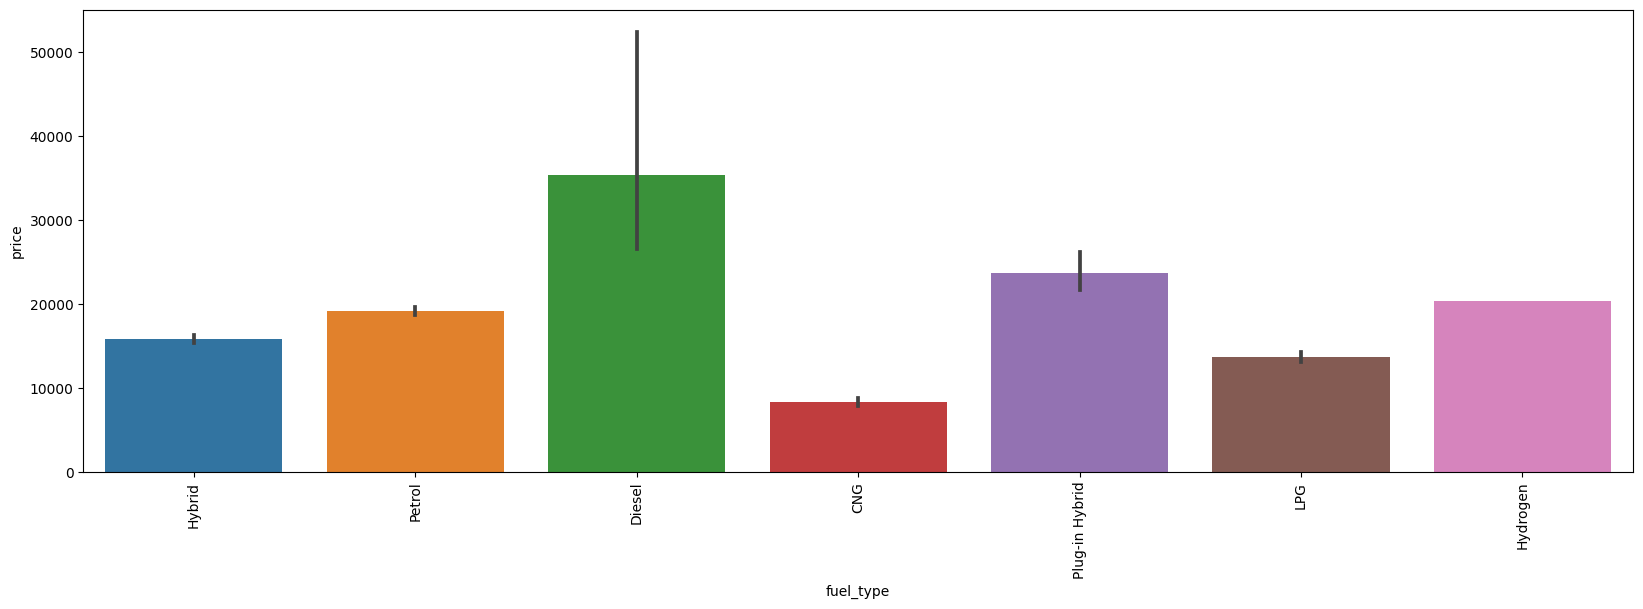

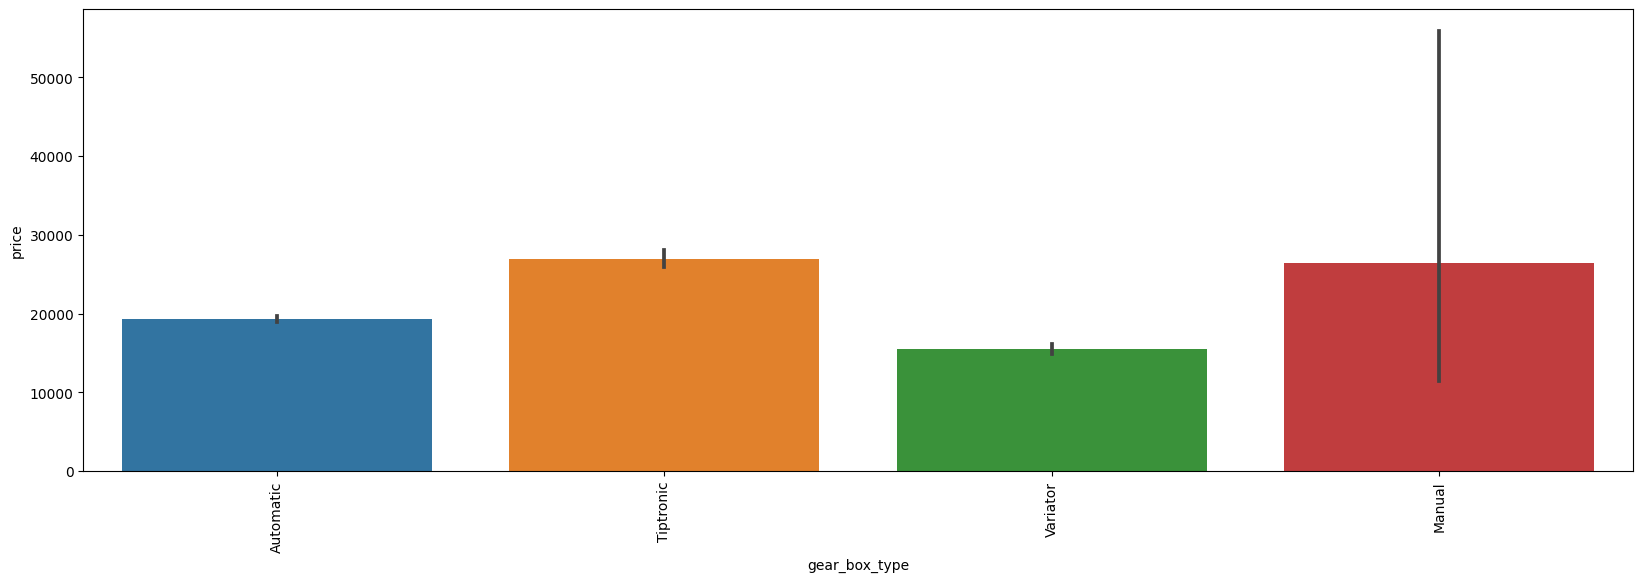

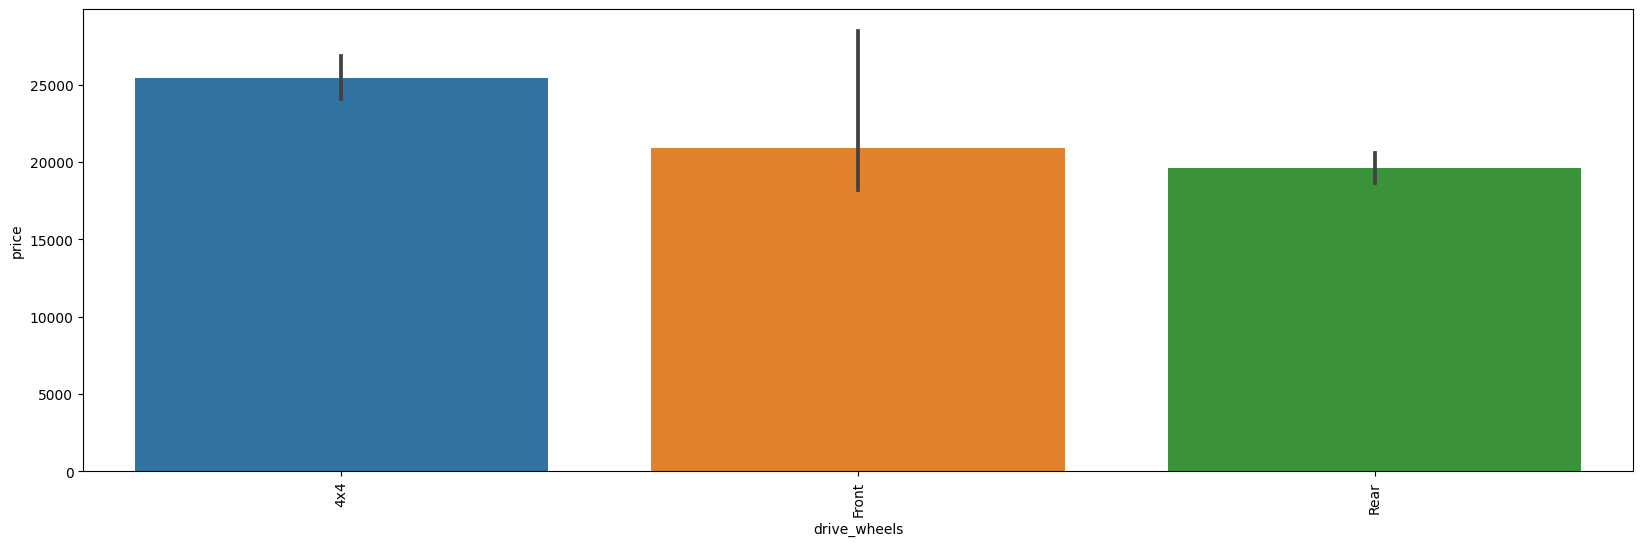

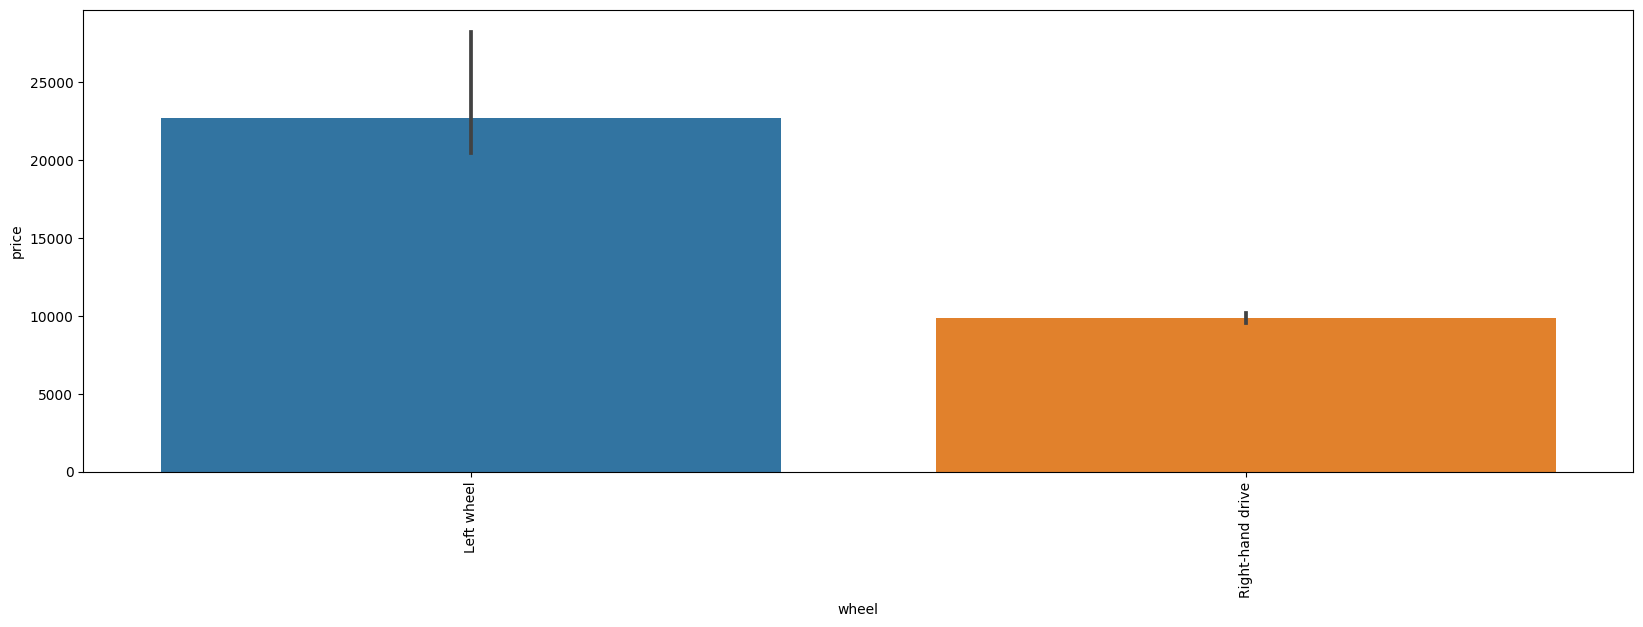

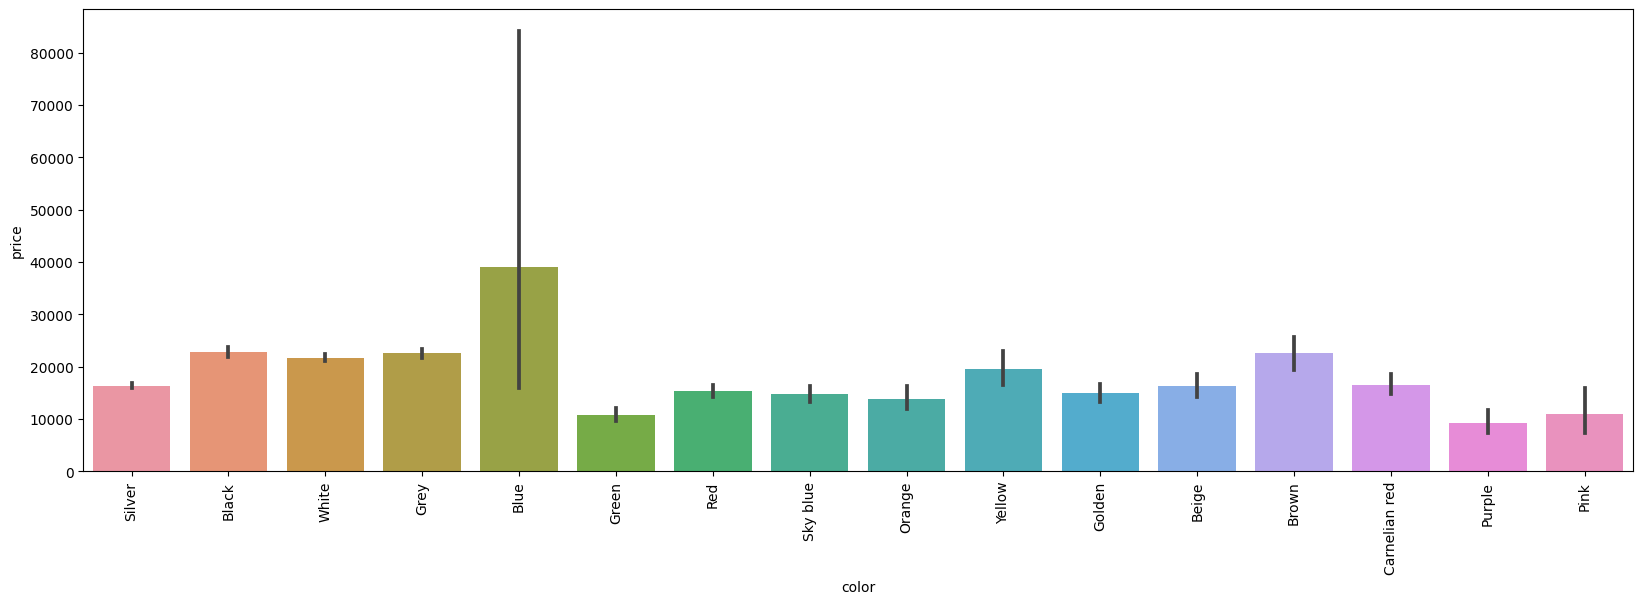

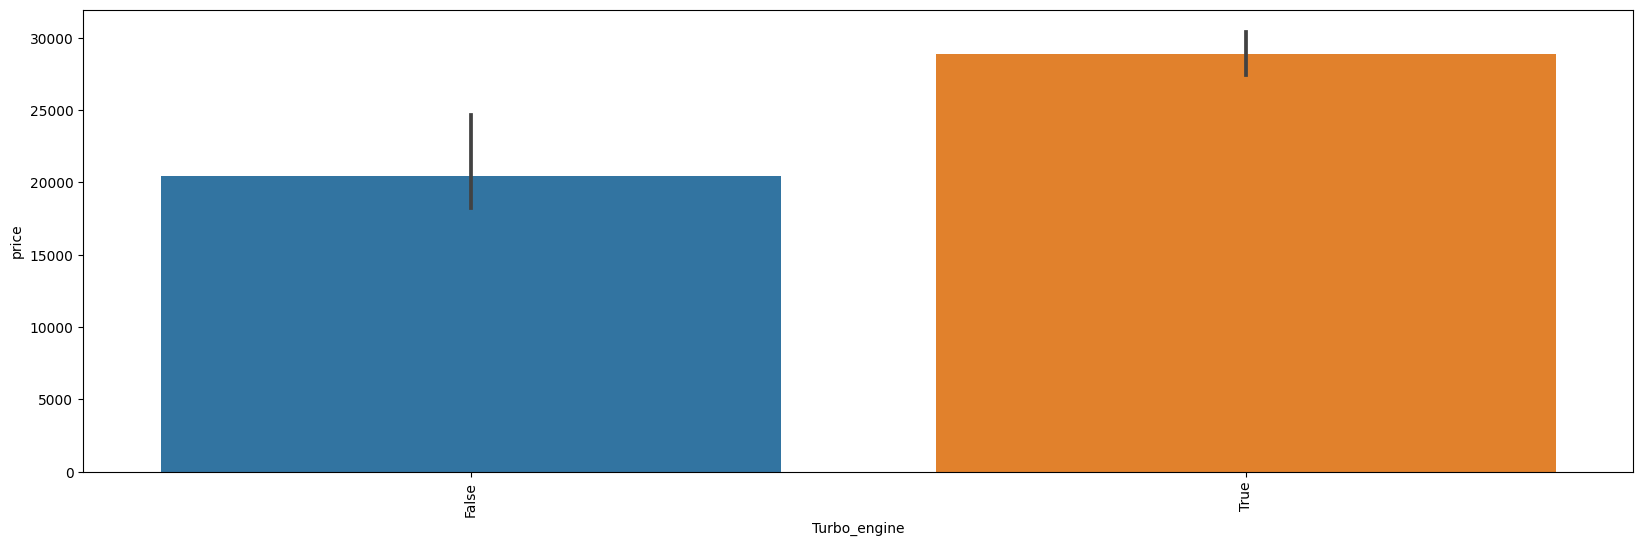

In [20]:
for col in categorical_col:
    plt.figure(figsize=(20,6))
    sns.barplot(x=df[col],y=df['price'])
    plt.xticks(rotation=90)

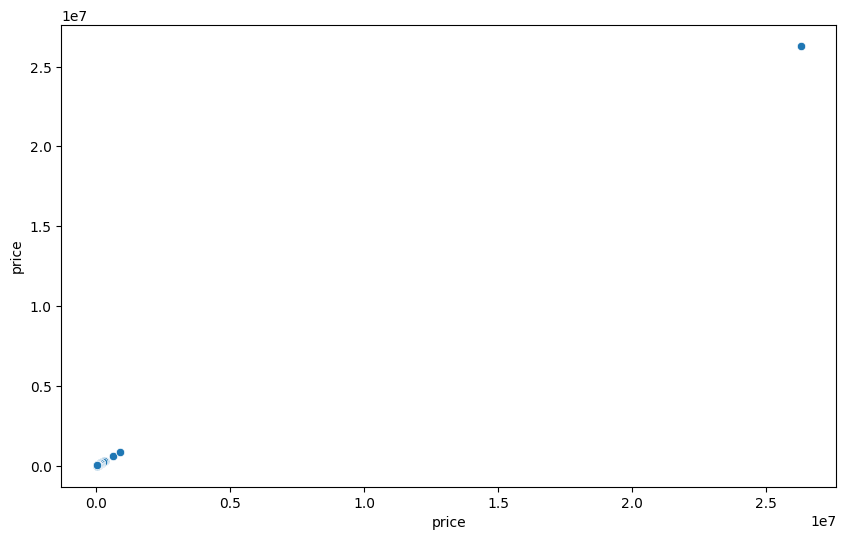

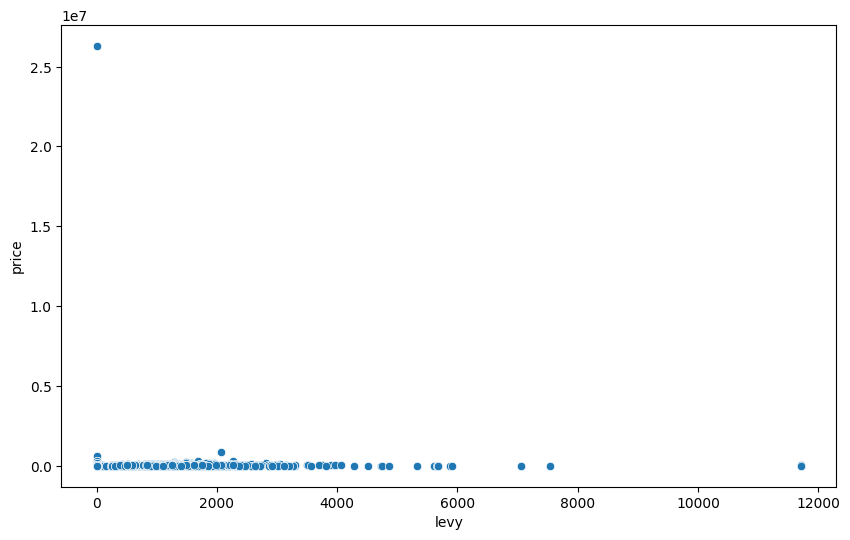

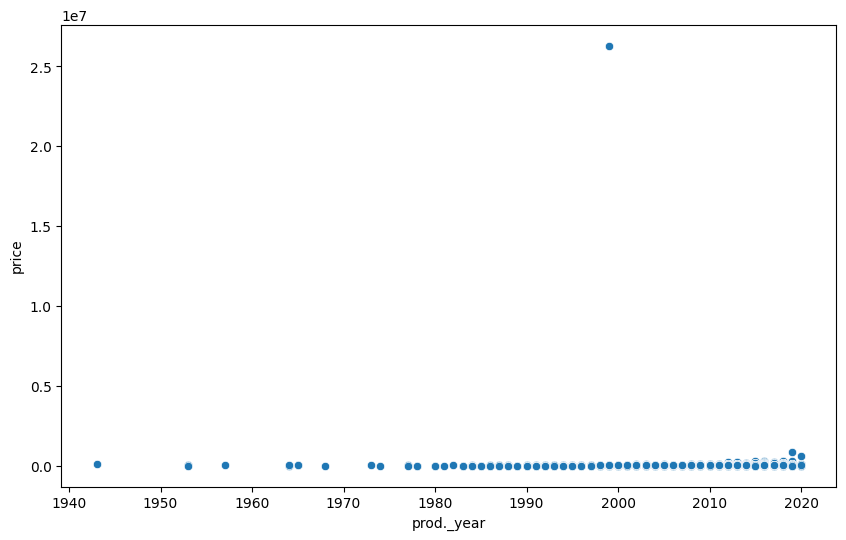

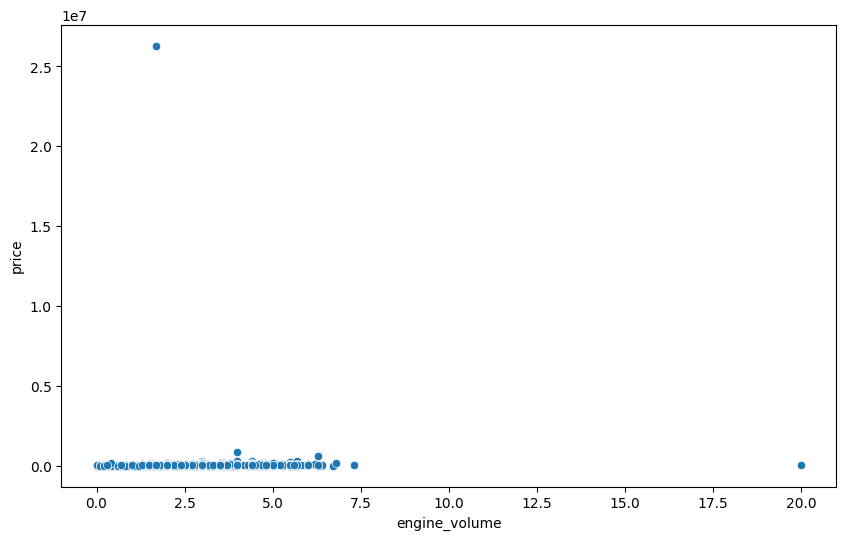

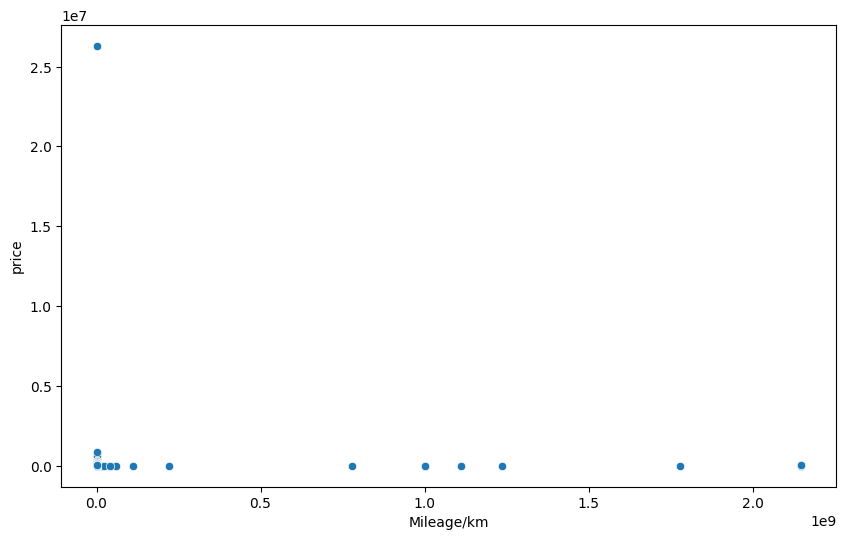

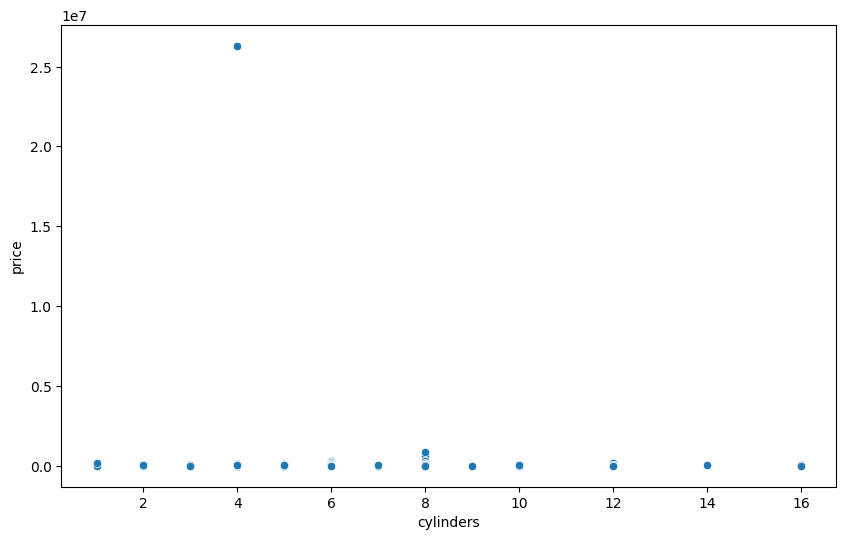

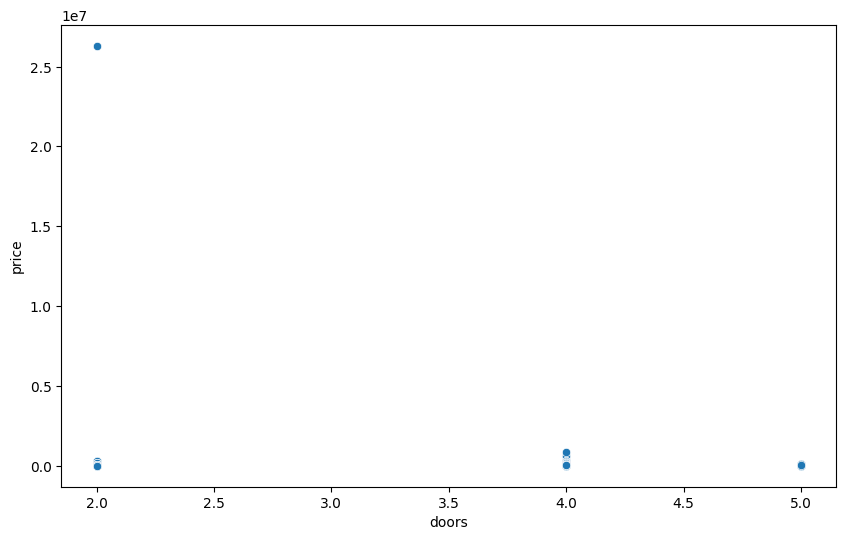

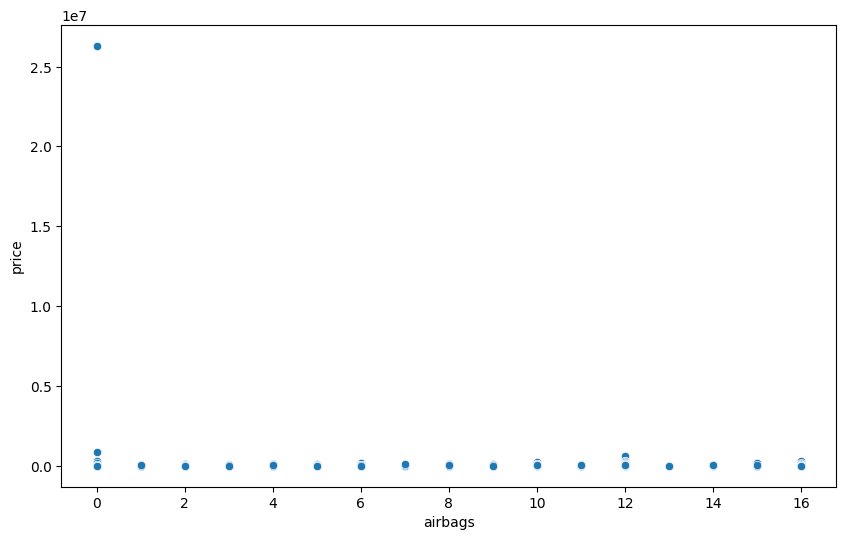

In [21]:
# Plot the numerical variables 
for col in numerical_col:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df[col], y=df['price'])

# Cleaning the dataset of the outliers

In [22]:
df = df.drop(df[df['Mileage/km'] > 1000000].index)
df = df.drop(df[df['engine_volume'] > 10].index)
df = df.drop(df[df['price'] > 200000].index)

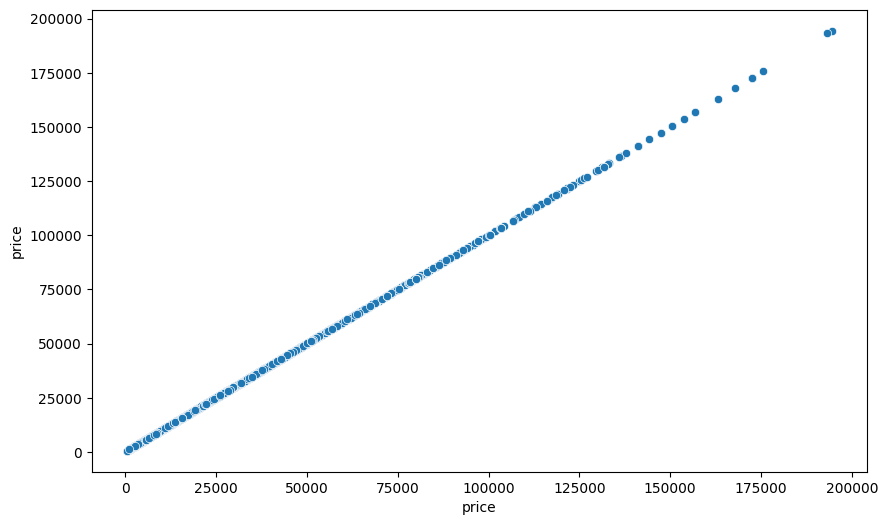

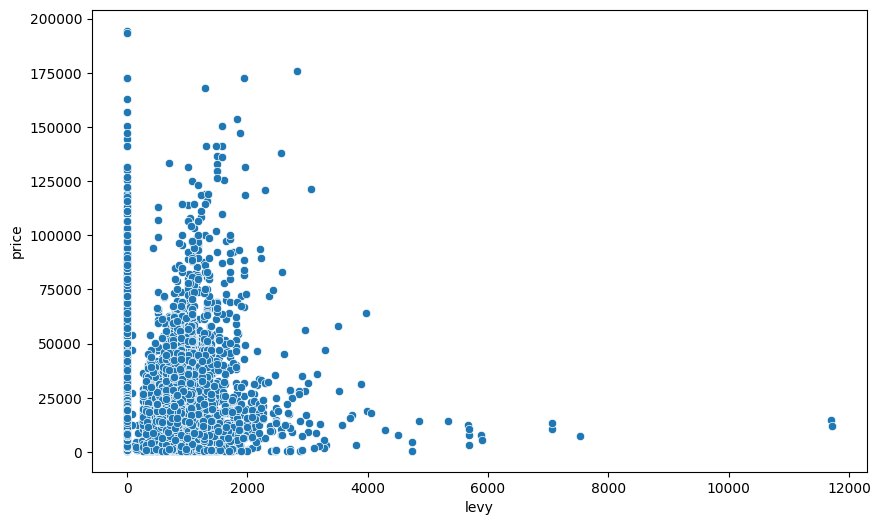

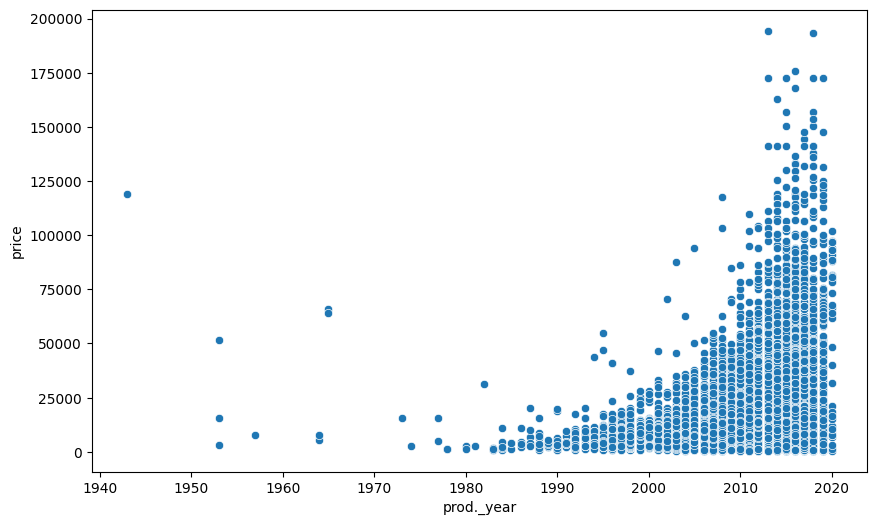

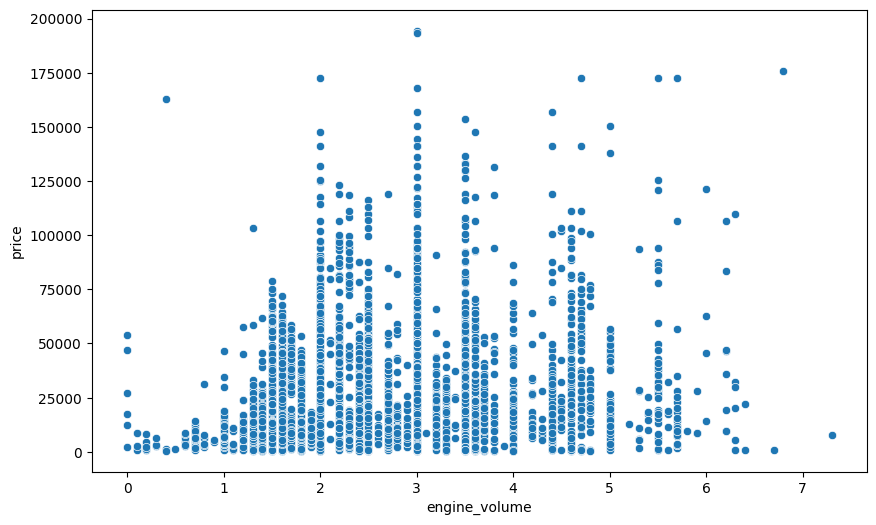

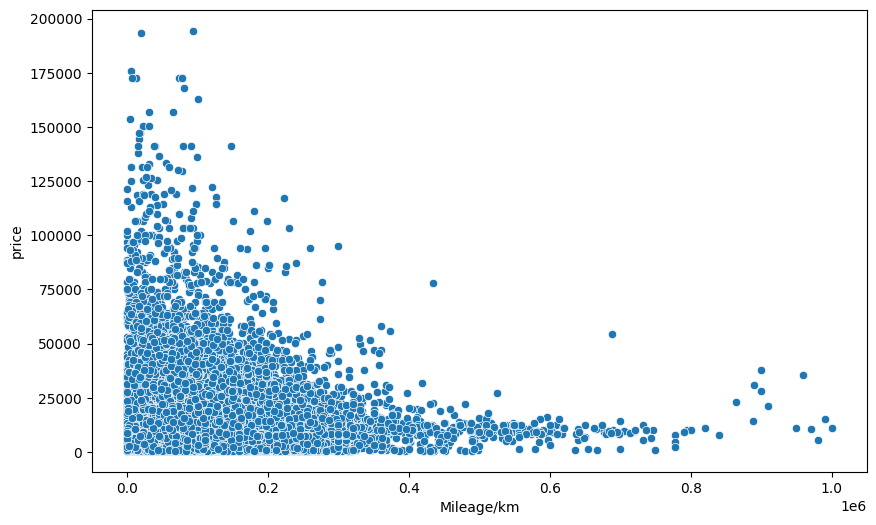

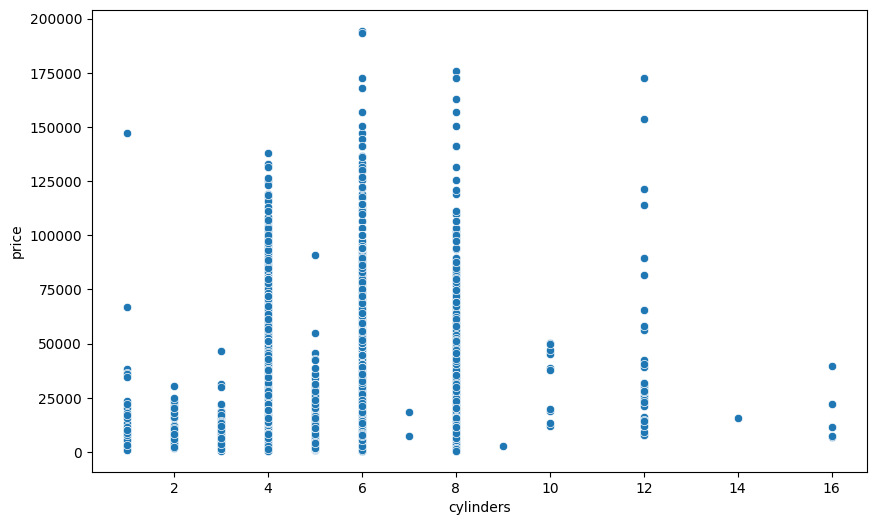

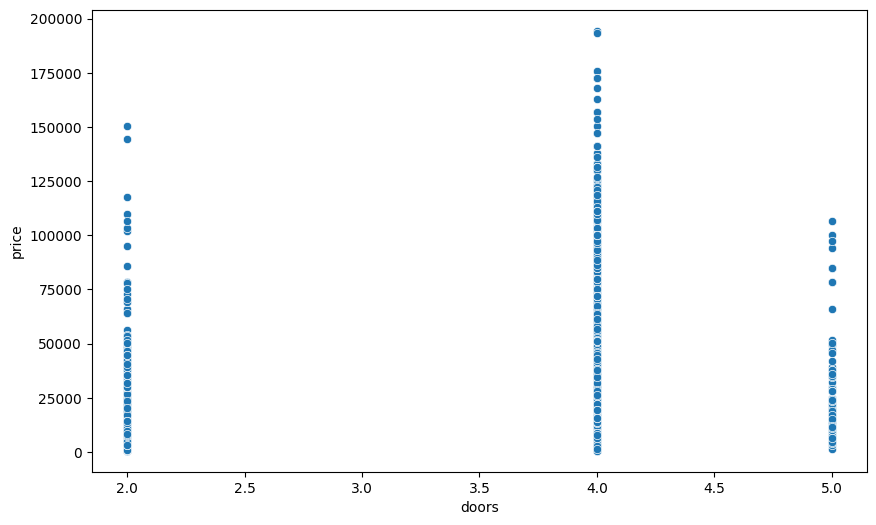

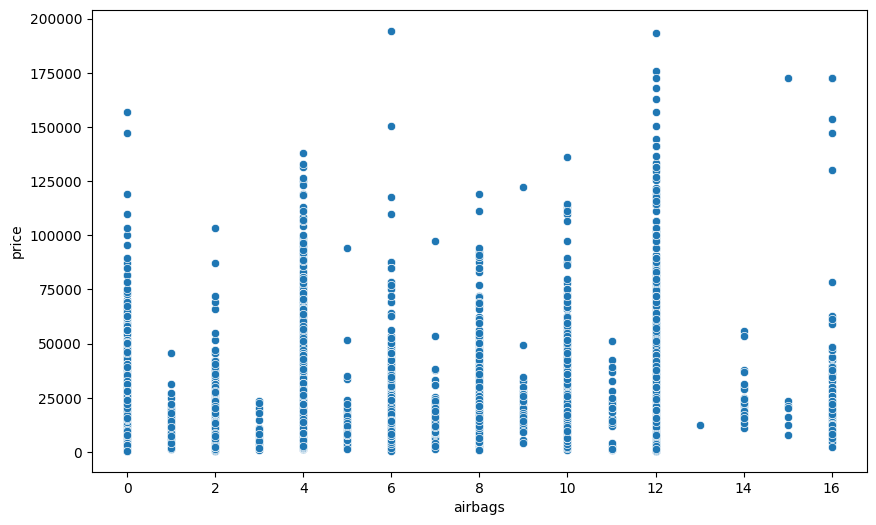

In [23]:
# Plot the numerical variables 
for col in numerical_col:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df[col], y=df['price'])

In [24]:
df['category'].value_counts()

Sedan          6558
Jeep           3979
Hatchback      2322
Minivan         509
Coupe           455
Universal       307
Microbus        279
Goods wagon     221
Pickup           47
Cabriolet        33
Limousine         6
Name: category, dtype: int64

Text(0.5, 1.0, ' by each Category')

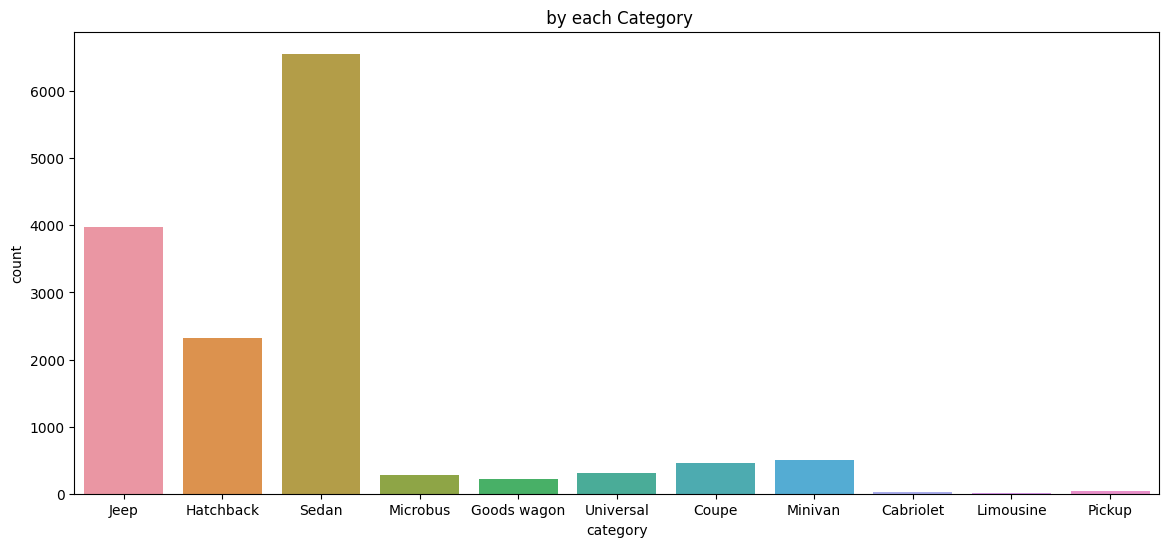

In [25]:
plt.subplots(figsize=(14,6))
sns.countplot(data= df, x='category')
plt.title(" by each Category")


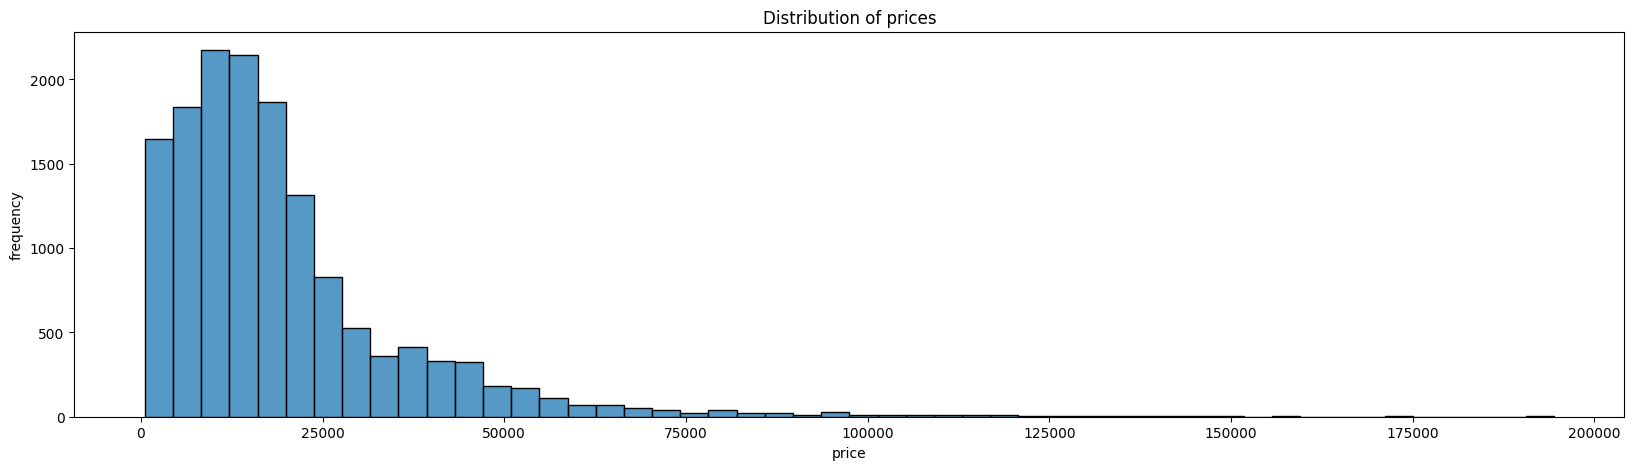

In [26]:
plt.figure(figsize=(20,5))
sns.histplot(df.price[df.price<200000],bins=50)
plt.ylabel("frequency")
plt.xlabel("price")
plt.title("Distribution of prices")
plt.show()

# Model 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
import pickle

In [28]:
le = preprocessing.LabelEncoder()

In [29]:
le.fit(df['leather_interior'])
le_leather_interior_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_leather_interior_mapping)
df['leather_interior'] = le.transform(df['leather_interior'])

{'No': 0, 'Yes': 1}


In [30]:
le.fit(df['fuel_type'])
le_fuel_type_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_fuel_type_mapping)
df['fuel_type'] = le.transform(df['fuel_type'])

{'CNG': 0, 'Diesel': 1, 'Hybrid': 2, 'Hydrogen': 3, 'LPG': 4, 'Petrol': 5, 'Plug-in Hybrid': 6}


In [31]:
le.fit(df['gear_box_type'])
le_gear_box_type_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_gear_box_type_mapping)
df['gear_box_type'] = le.transform(df['gear_box_type'])

{'Automatic': 0, 'Manual': 1, 'Tiptronic': 2, 'Variator': 3}


In [32]:
le.fit(df['drive_wheels'])
le_drive_wheels_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_drive_wheels_mapping)
df['drive_wheels'] = le.transform(df['drive_wheels'])

{'4x4': 0, 'Front': 1, 'Rear': 2}


In [33]:
le.fit(df['wheel'])
le_wheel_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_wheel_mapping)
df['wheel'] = le.transform(df['wheel'])

{'Left wheel': 0, 'Right-hand drive': 1}


In [34]:
le.fit(df['category'])
le_category_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_category_mapping)
df['category'] = le.transform(df['category'])

{'Cabriolet': 0, 'Coupe': 1, 'Goods wagon': 2, 'Hatchback': 3, 'Jeep': 4, 'Limousine': 5, 'Microbus': 6, 'Minivan': 7, 'Pickup': 8, 'Sedan': 9, 'Universal': 10}


In [35]:
le.fit(df['manufacturer'])
le_manufacturer_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_manufacturer_mapping)
df['manufacturer'] = le.transform(df['manufacturer'])

{'ACURA': 0, 'ALFA ROMEO': 1, 'ASTON MARTIN': 2, 'AUDI': 3, 'BENTLEY': 4, 'BMW': 5, 'BUICK': 6, 'CADILLAC': 7, 'CHEVROLET': 8, 'CHRYSLER': 9, 'CITROEN': 10, 'DAEWOO': 11, 'DAIHATSU': 12, 'DODGE': 13, 'FERRARI': 14, 'FIAT': 15, 'FORD': 16, 'GAZ': 17, 'GMC': 18, 'GREATWALL': 19, 'HAVAL': 20, 'HONDA': 21, 'HUMMER': 22, 'HYUNDAI': 23, 'INFINITI': 24, 'ISUZU': 25, 'JAGUAR': 26, 'JEEP': 27, 'KIA': 28, 'LANCIA': 29, 'LAND ROVER': 30, 'LEXUS': 31, 'LINCOLN': 32, 'MASERATI': 33, 'MAZDA': 34, 'MERCEDES-BENZ': 35, 'MERCURY': 36, 'MINI': 37, 'MITSUBISHI': 38, 'MOSKVICH': 39, 'NISSAN': 40, 'OPEL': 41, 'PEUGEOT': 42, 'PONTIAC': 43, 'PORSCHE': 44, 'RENAULT': 45, 'ROVER': 46, 'SAAB': 47, 'SATURN': 48, 'SCION': 49, 'SEAT': 50, 'SKODA': 51, 'SSANGYONG': 52, 'SUBARU': 53, 'SUZUKI': 54, 'TESLA': 55, 'TOYOTA': 56, 'UAZ': 57, 'VAZ': 58, 'VOLKSWAGEN': 59, 'VOLVO': 60, 'ZAZ': 61, 'სხვა': 62}


In [36]:
le.fit(df['color'])
le_color_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_color_mapping)
df['color'] = le.transform(df['color'])

{'Beige': 0, 'Black': 1, 'Blue': 2, 'Brown': 3, 'Carnelian red': 4, 'Golden': 5, 'Green': 6, 'Grey': 7, 'Orange': 8, 'Pink': 9, 'Purple': 10, 'Red': 11, 'Silver': 12, 'Sky blue': 13, 'White': 14, 'Yellow': 15}


In [37]:
X = df.drop(["price","model"], axis = 1)
y = df["price"]

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
df.head()

,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,Mileage/km,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,Turbo_engine
0,13328,"1,399.00",31,RX 450,2010,4,1,2,3.50,186005,6,0,0,4,0,12,12,False
1,16621,"1,018.00",8,Equinox,2011,4,0,5,3.00,192000,6,2,0,4,0,1,8,False
2,8467,0.00,21,FIT,2006,3,0,5,1.30,200000,4,3,1,4,1,1,2,False
3,3607,862.00,16,Escape,2011,4,1,2,2.50,168966,4,0,0,4,0,14,0,False
4,11726,446.00,21,FIT,2014,3,1,5,1.30,91901,4,0,1,4,0,12,4,False


<AxesSubplot: >

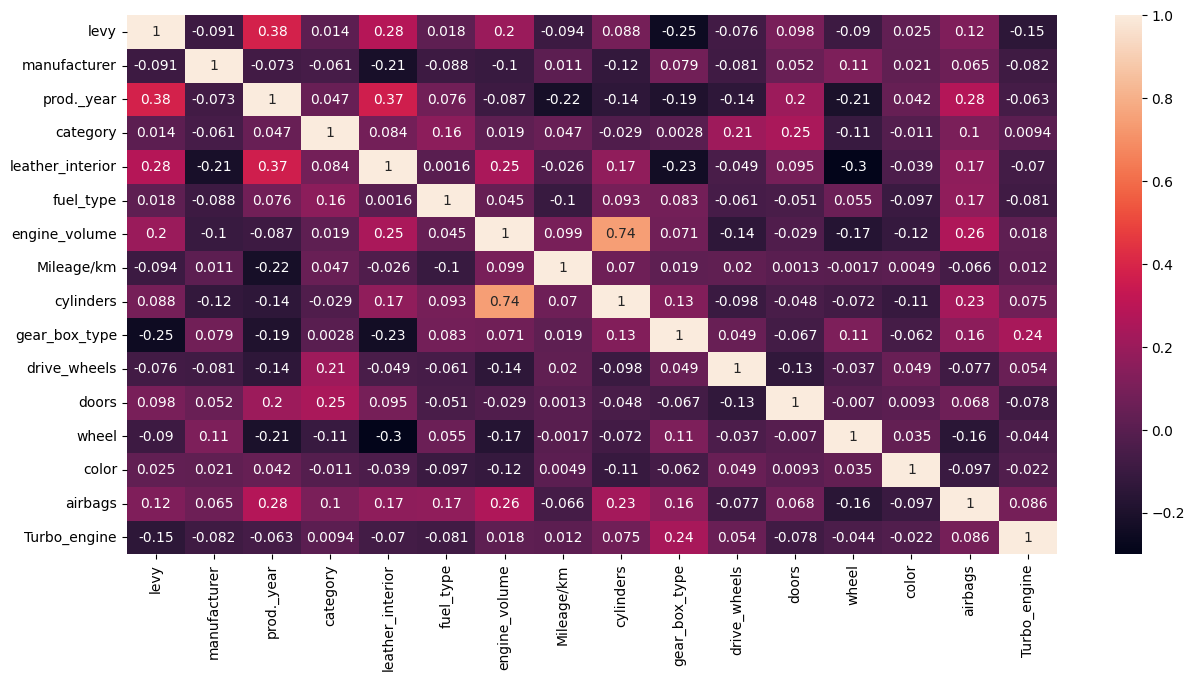

In [40]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(),annot=True)

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()

linReg.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = linReg.predict(X_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
print('The mean absolute error is:', score) 

The mean absolute error is: 9450.25712983015


## Random Forest

In [42]:
# we will create many models with different parametrs 
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]


def score_model(model, X_t=X_train, X_v=X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("The Model %d has a MAE: %d" % (i+1, mae))

The Model 1 has a MAE: 5026
The Model 2 has a MAE: 5000
The Model 3 has a MAE: 4922
The Model 4 has a MAE: 5133
The Model 5 has a MAE: 6390


## XGB

In [43]:
import xgboost as xgb
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
xgbModel = xgb.train(
   params=params,
   dtrain=dtrain_reg
)
pickle.dump(xgbModel, open('xgbModel_CarPricePrediction.pkl', 'wb'))

In [44]:
y_pred = xgbModel.predict(dtest_reg)

xgbMAE = mean_absolute_error(y_test, y_pred)

print("\nMAE = ", xgbMAE)


MAE =  5851.0787651227865


In [46]:
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
def score_model(model, X_t=X_train, X_v=X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    pickle.dump(model, open('rfModel_CarPricePrediction.pkl', 'wb'))
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)
mae = score_model(model_3)
print("The Model %d has a MAE: %d" % (i+1, mae))

The Model 5 has a MAE: 4922


In [48]:
mapping_dict = {
    'interiors': le_leather_interior_mapping,
    'fuel_type': le_fuel_type_mapping,
    'gear_box': le_gear_box_type_mapping,
    'drive-wheel': le_drive_wheels_mapping,
    'wheel': le_wheel_mapping,
    'category': le_category_mapping,
    'manufacturer': le_manufacturer_mapping,
    'color': le_color_mapping
}

In [49]:
file_path = 'encoded_values.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(mapping_dict, file)

In [50]:
with open(file_path, 'rb') as file:
    newDict = pickle.load(file)

In [51]:
newDict['interiors']['Yes']

1